$\Large\textbf{Welcome to IE 684 (Spring 2021-22)}$  

$\large\textbf{Lab 1 Exercise 1. }$

We will start with a procedure which helps to find a minimizer of the function $f(\mathbf{x})=f(x_1,x_2)= (x_1+100)^2 + (x_2-25)^2$. 

Note that the gradient of $f(\mathbf{x})$ is given by:

$
\nabla f(\mathbf{x}) = \begin{bmatrix} \frac{\partial f(\mathbf{x})}{\partial x_1} \\ \frac{\partial f(\mathbf{x})}{\partial x_2}\end{bmatrix}. 
$

We will use the following gradient descent type algorithm: 

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$, Steplength $\eta$}  \\
& \textbf{Initialize } k=0 \\ 
&\textbf{While } \| \nabla f(\mathbf{x}^k) \|_2 > \tau \text{ do:}  \\   
&\quad \quad \mathbf{x}^{k+1} \leftarrow \mathbf{x}^k - \eta \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}


In [1]:
#numpy package will be used for most of our lab exercises. Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [2]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray 
  assert len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  return (x[0]+100)**2 + (x[1]-25)**2


In [3]:
#check whether you can pass arbitrary arguments to evalf 
#my_x = [1,3] #Note: my_x is a list of 2 elements, but not a numpy array
#print('f(my_x) is:',evalf(my_x))

In [4]:
# First we will create a numpy array of size 2
my_x = np.array([1,2])
print('type of my_x',type(my_x), 'length of my_x:',len(my_x)) #verify if my_x is indeed a numpy array of size 2


type of my_x <class 'numpy.ndarray'> length of my_x: 2


In [5]:
#now call evalf (x) with my_x as argument and check if it works
#print(evalf(my_x))

In [6]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  return np.array([2*(x[0]+100),2*(x[1]-25)])

In [7]:
def find_minimizer(start_x, tol, step_length):
  ''' 
  start_x : is starting point of vector x
  tol: tolerance  value or value of  epsillon or thresh hold that if my gradient value is less than that we assume it is minimum value
  step_length : step length ''' 
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  assert type(step_length) is float and step_length>=0 
  x = start_x
  g_x = evalg(x)
  k = 0

  #we can manage a list to store the function values, might be useful for plotting 
  fvals = [evalf(x)]
  print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #append the current function value to the list containing function values
    fvals.append(evalf(x))
    print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x, fvals 


In [8]:
my_start_x = np.array([10,10])
my_steplength = 0.1
my_tol= 1e-3 #10^{-3} or 0.001
opt_x, fvals_ret = find_minimizer(my_start_x, my_tol, my_steplength)
print('Optimizer:',opt_x)

iter: 0  x: [10 10]  f(x): 12325  grad at x: [220 -30]  gradient norm: 222.03603311174518
iter: 1  x: [-12.  13.]  f(x): 7888.0  grad at x: [176. -24.]  gradient norm: 177.62882648939615
iter: 2  x: [-29.6  15.4]  f(x): 5048.320000000001  grad at x: [140.8 -19.2]  gradient norm: 142.10306119151693
iter: 3  x: [-43.68  17.32]  f(x): 3230.9247999999993  grad at x: [112.64 -15.36]  gradient norm: 113.68244895321352
iter: 4  x: [-54.944  18.856]  f(x): 2067.791872  grad at x: [ 90.112 -12.288]  gradient norm: 90.94595916257082
iter: 5  x: [-63.9552  20.0848]  f(x): 1323.3867980799996  grad at x: [72.0896 -9.8304]  gradient norm: 72.75676733005665
iter: 6  x: [-71.16416  21.06784]  f(x): 846.9675507711995  grad at x: [57.67168 -7.86432]  gradient norm: 58.20541386404531
iter: 7  x: [-76.931328  21.854272]  f(x): 542.0592324935676  grad at x: [46.137344 -6.291456]  gradient norm: 46.56433109123625
iter: 8  x: [-81.5450624  22.4834176]  f(x): 346.9179087958833  grad at x: [36.9098752 -5.03316

$\huge{sol \ \ 2}$


minimizer of function is [-99.99958844  24.99994388]

minimum value of function is 1.7253033717248775e-07 i.e 0 approx

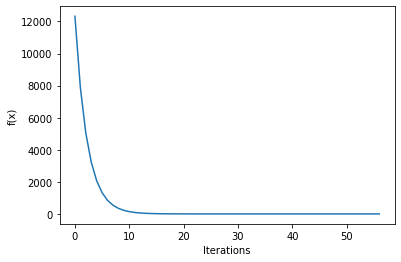

In [9]:
#we will plot the function values and check the behavior
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(fvals_ret)
plt.xlabel('Iterations')
plt.ylabel('f(x)')
plt.show()

${\Large\text{Do not forget to rename the file before submission.}}$

## solution 3

In [10]:
def find_minimizer3(start_x, tol, step_length):
  ''' 
  start_x : is starting point of vector x
  tol: tolerance  value or value of  epsillon or thresh hold that if my gradient value is less than that we assume it is minimum value
  step_length : step length ''' 
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  assert type(step_length) is float and step_length>=0 
  x = start_x
  g_x = evalg(x)
  k = 0

  #we can manage a list to store the function values, might be useful for plotting 
  fvals = [evalf(x)]

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #append the current function value to the list containing function values
    fvals.append(evalf(x))
  
  return x, fvals[-1],k 


tolerance value is 0.1 final minimizer is : [-99.9553787   24.99391528] final objective function value is : 0.0020280843668995063 number of iteration taken by algorithm is : 35
tolerance value is 0.01 final minimizer is : [-99.99520882  24.99934666] final objective function value is : 2.3382220797474075e-05 number of iteration taken by algorithm is : 45
tolerance value is 0.001 final minimizer is : [-99.99958844  24.99994388] final objective function value is : 1.7253033717248775e-07 number of iteration taken by algorithm is : 56
tolerance value is 0.0001 final minimizer is : [-99.99995581  24.99999397] final objective function value is : 1.989139359193299e-09 number of iteration taken by algorithm is : 66
tolerance value is 1e-05 final minimizer is : [-99.99999526  24.99999935] final objective function value is : 2.293321544605827e-11 number of iteration taken by algorithm is : 76
tolerance value is 1e-06 final minimizer is : [-99.99999959  24.99999994] final objective function value 

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


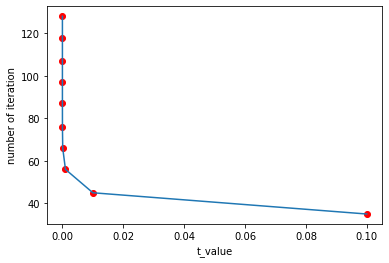

In [11]:
start_x=np.array([10,10])
step_length=0.1
k=[]
result=[]
tolerance=[10**(-p) for p in range(1,11)]
for i in tolerance:
  final_minimizer,final_objective,iteration=find_minimizer3(start_x,i,step_length)
  result.append([i,final_minimizer,final_objective,iteration])
  print('tolerance value is',i,'final minimizer is :',final_minimizer,'final objective function value is :',final_objective,'number of iteration taken by algorithm is :',iteration)
  k.append(iteration)
result=np.transpose(result)
import matplotlib.pyplot as plt
plt.plot(tolerance,k)
plt.scatter(tolerance,k,color='r')
plt.xlabel('t_value')
plt.ylabel('number of iteration')
plt.show()

|index|tolerance value|final minimizer|final objective function value |number of iteration taken|
|---|---|---|---|---|
|0|0\.1|\[-99\.9553787   24\.99391528\]|0\.0020280843668995063|35|
|1|0\.01|\[-99\.99520882  24\.99934666\]|2\.3382220797474075e-05|45|
|2|0\.001|\[-99\.99958844  24\.99994388\]|1\.7253033717248775e-07|56|
|3|0\.0001|\[-99\.99995581  24\.99999397\]|1\.989139359193299e-09|66|
|4|1e-05|\[-99\.99999526  24\.99999935\]|2\.293321544605827e-11|76|
|5|1e-06|\[-99\.99999959  24\.99999994\]|1\.6921726745458407e-13|87|
|6|1e-07|\[-99\.99999996  24\.99999999\]|1\.950942200128245e-15|97|
|7|1e-08|\[-100\.   25\.\]|2\.249273021138356e-17|107|
|8|1e-09|\[-100\.   25\.\]|1\.6597088735501767e-19|118|
|9|1e-10|\[-100\.   25\.\]|1\.9135732950098918e-21|128|

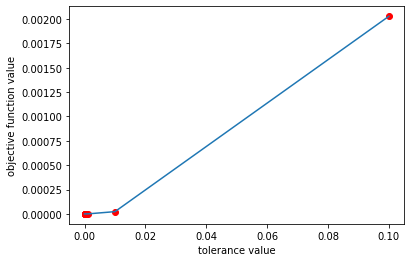

In [12]:
plt.plot(result[0],result[2])
plt.scatter(result[0],result[2],color='r')
plt.xlabel('tolerance value')
plt.ylabel('objective function value')
plt.show()

from the above table it is clear that if we reduce the tolerance value we are converging to actual minimizer value and actual objective function value 
as tolerance value reduce number of iteration increase 
we can say that tolerance value is inversaly proportional to number of iteration 
and as tolerance value tends to 0 minimizer and objective function value tends to actual minimizer and objective function value

from above table it is clear that the minimizer is [-100,25] is same for all tolerance value in our case and objective value is 0 


## solution 4

step length is 0.0001 final minimizer is : [-99.99999505  24.99999932] final objective function value is : 2.49936770204995e-11 number of iteration taken by algorithm is : 84571
step length is 0.001 final minimizer is : [-99.99999505  24.99999933] final objective function value is : 2.494219709847674e-11 number of iteration taken by algorithm is : 8450
step length is 0.01 final minimizer is : [-99.99999512  24.99999933] final objective function value is : 2.4304673044883465e-11 number of iteration taken by algorithm is : 838
step length is 0.1 final minimizer is : [-99.99999526  24.99999935] final objective function value is : 2.293321544605827e-11 number of iteration taken by algorithm is : 76
step length is 0.2 final minimizer is : [-99.99999685  24.99999957] final objective function value is : 1.011747066175869e-11 number of iteration taken by algorithm is : 34
step length is 0.4 final minimizer is : [-99.99999775  24.99999969] final objective function value is : 5.169479687800271e-

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


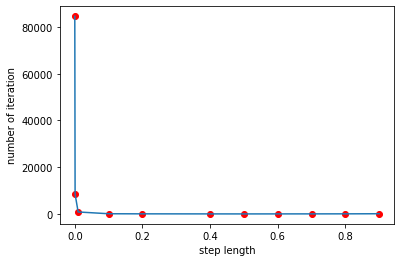

In [13]:
start_x=np.array([10,10])
step_length=[0.0001,0.001,0.01,0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9]
k=[]
result=[]
tolerance=10**-5
for i in step_length:
  final_minimizer,final_objective,iteration=find_minimizer3(start_x,tolerance,i)
  print('step length is',i,'final minimizer is :',final_minimizer,'final objective function value is :',final_objective,'number of iteration taken by algorithm is :',iteration)
  result.append([i,final_minimizer,final_objective,iteration])
  k.append(iteration)
result=np.transpose(result)
import matplotlib.pyplot as plt
plt.plot(step_length,k)
plt.scatter(step_length,k,color='r')
plt.xlabel('step length')
plt.ylabel('number of iteration')
plt.show()

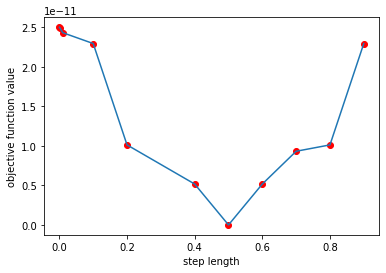

In [14]:
plt.plot(result[0],result[2])
plt.scatter(result[0],result[2],color='r')
plt.xlabel('step length')
plt.ylabel('objective function value')
plt.show()

|index|step length|final minimizer|final objective function value |number of iteration taken|
|---|---|---|---|---|
|0|0\.0001|\[-99\.99999505  24\.99999932\]|2\.49936770204995e-11|84571|
|1|0\.001|\[-99\.99999505  24\.99999933\]|2\.494219709847674e-11|8450|
|2|0\.01|\[-99\.99999512  24\.99999933\]|2\.4304673044883465e-11|838|
|3|0\.1|\[-99\.99999526  24\.99999935\]|2\.293321544605827e-11|76|
|4|0\.2|\[-99\.99999685  24\.99999957\]|1\.011747066175869e-11|34|
|5|0\.4|\[-99\.99999775  24\.99999969\]|5\.169479687800271e-12|11|
|6|0\.5|\[-100\.   25\.\]|0|1|
|7|0\.6|\[-100\.00000225   25\.00000031\]|5\.169479687800271e-12|11|
|8|0\.7|\[-100\.00000302   25\.00000041\]|9\.312506683476372e-12|19|
|9|0\.8|\[-99\.99999685  24\.99999957\]|1\.011747066175869e-11|34|
|10|0\.9|\[-99\.99999526  24\.99999935\]|2\.293321544605827e-11|76|

we can see that from above table 
as step length increase upto certain value (here 0.5) number of iteration decrease and after that by increasing step length number of iteration is also increase 

if we have to consider value of step length for this question 0.5 is perfect  here 
also we can think $\alpha$ is perfect step length at the point where number of iteration start incresing after decreasing here 0.5

here objective function and minimizer is not changed so much it is approx same

since in our problem only one local minima so by changing step length minimizer and objective value is not changed so much it's approx same  but when in a function more than one local minima then it has chance when we change step length objective function value and minimizer also changed

##solution 5

In [15]:
start_x=[[10000,10000],[500,0],[0,1000],[1,1],[-500,-2]]
step_length=0.1
k=[]
result=[]
tolerance=10**-5
for i in start_x:
  final_minimizer,final_objective,iteration=find_minimizer3(np.array(i),tolerance,step_length)
  result.append([i,final_minimizer,final_objective,iteration])
  print('final minimizer is :',final_minimizer,'final objective function value is :',final_objective,'number of iteration taken by algorithm is :',iteration)
  k.append(iteration)
result=np.transpose(result)

final minimizer is : [-99.99999679  25.00000317] final objective function value is : 2.0414342669998657e-11 number of iteration taken by algorithm is : 98
final minimizer is : [-99.99999566  24.99999982] final objective function value is : 1.888746375147865e-11 number of iteration taken by algorithm is : 84
final minimizer is : [-99.99999954  25.00000452] final objective function value is : 2.060780080476227e-11 number of iteration taken by algorithm is : 86
final minimizer is : [-99.99999564  24.99999896] final objective function value is : 2.0052840841640608e-11 number of iteration taken by algorithm is : 76
final minimizer is : [-100.00000452   24.99999969] final objective function value is : 2.055190630073527e-11 number of iteration taken by algorithm is : 82


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


|index|starting point|final minimizer|final objective function value |number of iteration taken|
|---|---|---|---|---|
|0|10000,10000|\[-99\.99999679  25\.00000317\]|2\.0414342669998657e-11|98|
|1|500,0|\[-99\.99999566  24\.99999982\]|1\.888746375147865e-11|84|
|2|0,1000|\[-99\.99999954  25\.00000452\]|2\.060780080476227e-11|86|
|3|1,1|\[-99\.99999564  24\.99999896\]|2\.0052840841640608e-11|76|
|4|-500,-2|\[-100\.00000452   24\.99999969\]|2\.055190630073527e-11|82|

here all the starting point value is away from minimizer so it takes some extra iteration to rich actual minimizer 
if we take starting point near to minimizer it takes less time but if we take stariting point away from minimizer it takes extra iteration to rich actual minimizer
since in our problem only one local minima so by changing starting point minimizer and objective value is not changed so much it's approx same  but when in a function more than one local minima then it has chance when we change starting point  objective function value and minimizer also changed